In [2]:
import cv2
import os
import torch
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets, transforms
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import pandas as pd


In [3]:
dataset_path = Path('icg-freshers-data-science-competition/Dataset/')
train_path = dataset_path/"Train"
test_path = dataset_path/"Test"

In [4]:
train_path

PosixPath('icg-freshers-data-science-competition/Dataset/Train')

In [5]:
# count
for x, y, z in os.walk('icg-freshers-data-science-competition/Dataset/'):
    print(x,y,z)

icg-freshers-data-science-competition/Dataset/ ['Train', 'Test'] ['Sample_submission.csv']
icg-freshers-data-science-competition/Dataset/Train ['Zeroes_and_Crosses', 'Grids'] ['.~lock.Grid_labels.csv#', 'Grid_labels.csv']
icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses ['Zeroes', 'Cross'] []
icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes [] ['594.png', '611.png', '607.png', '597.png', '614.png', '599.png', '596.png', '601.png', '618.png', '609.png', '602.png', '617.png', '616.png', '604.png', '598.png', '613.png', '605.png', '595.png', '612.png', '610.png', '600.png', '615.png', '603.png', '606.png', '608.png']
icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Cross [] ['188.png', '195.png', '201.png', '185.png', '183.png', '184.png', '200.png', '194.png', '197.png', '191.png', '203.png', '189.png', '187.png', '205.png', '196.png', '204.png', '193.png', '202.png', '192.png', '186.png', '199.png', '190.png', '182

In [6]:
Path.cwd()

PosixPath('/home/aarush/Aarush/Coding/ICG Project')

In [7]:
train_images = list(train_path.glob("*/*/*.png"))
test_images = list(test_path.glob("*.png"))
train_images

[PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/594.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/611.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/607.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/597.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/614.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/599.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/596.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/601.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/618.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/6

In [8]:
len(train_images),len(test_images)

(50, 4495)

In [9]:
img = Image.open(train_images[2])

In [10]:
np.asarray(img).shape

(28, 28)

In [11]:
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

In [12]:
train_data = datasets.ImageFolder(root=Path.joinpath(train_path,"Zeroes_and_Crosses"), # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

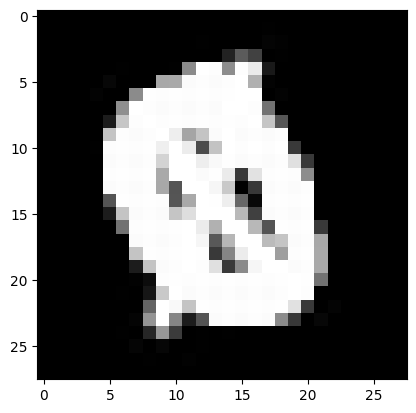

In [13]:

img = train_data[3][0]
img_permute = img.permute(1, 2, 0)
plt.imshow(img_permute)

In [14]:
train_data.classes

['Cross', 'Zeroes']

In [15]:
len(train_data)

50

In [16]:
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?


In [17]:
next(iter(train_dataloader))[0].shape

torch.Size([1, 3, 28, 28])

In [18]:
flatten_model = nn.Flatten()

In [19]:
# Create a convolutional neural network 
class Model_for_checking_0orX(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# optio784*100*100*10*60000/32ns = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model = Model_for_checking_0orX(input_shape=3, 
    hidden_units=100, 
    output_shape=len(train_data.classes))
model

Model_for_checking_0orX(
  (block_1): Sequential(
    (0): Conv2d(3, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4900, out_features=2, bias=True)
  )
)

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [21]:
def accuracy_function(y_pred,y):
    return torch.eq(y_pred.argmax(1),y).sum().item()/len(y_pred)*100

In [22]:
train_loss, train_acc = 0, 0
epochs = 20
for epoch in range(epochs):
    train_loss = 0
    train_accuracy = 0
    for Batch,(X,y) in enumerate(iter(train_dataloader)):
        model.train()
        y_pred = model(X)
        loss = loss_fn(y_pred,y)
        train_loss +=loss
        accuracy = accuracy_function(y_pred,y) 
        train_accuracy+=accuracy
        optimizer.zero_grad()
        loss.backward()
        # print(loss)
        optimizer.step()
    print(f"\n{epoch}|Average loss: {(train_loss/len(train_dataloader))}|Average Accuracy:{(train_accuracy/len(train_dataloader))}%\n")


0|Average loss: 0.7019031643867493|Average Accuracy:46.0%


1|Average loss: 0.6953052282333374|Average Accuracy:48.0%


2|Average loss: 0.6904139518737793|Average Accuracy:54.0%


3|Average loss: 0.6832519769668579|Average Accuracy:58.0%


4|Average loss: 0.6756300330162048|Average Accuracy:54.0%


5|Average loss: 0.6594074368476868|Average Accuracy:76.0%


6|Average loss: 0.6157457232475281|Average Accuracy:74.0%


7|Average loss: 0.5582798719406128|Average Accuracy:74.0%


8|Average loss: 0.44004905223846436|Average Accuracy:84.0%


9|Average loss: 0.30639195442199707|Average Accuracy:88.0%



KeyboardInterrupt: 

In [24]:
y.shape

torch.Size([1])

In [25]:
y_pred,y

(tensor([[-1.2068,  1.1637]], grad_fn=<AddmmBackward0>), tensor([1]))

In [26]:
(X,y) = next(iter(train_dataloader))
X.shape
X[0][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [27]:
img,
y_pred = model(train_data[:,0].unsqueeze(0))

TypeError: list indices must be integers or slices, not tuple

In [28]:
train_images

[PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/594.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/611.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/607.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/597.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/614.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/599.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/596.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/601.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/618.png'),
 PosixPath('icg-freshers-data-science-competition/Dataset/Train/Zeroes_and_Crosses/Zeroes/6

In [29]:
y_pred = []
for x in range(len(train_data)):
    result = model(train_data[x][0].unsqueeze(0)).argmax(1)
    y_pred.append(result)

In [30]:
result_1 = model(train_data[0][0].unsqueeze(0))
result_1

tensor([[ 1.8684, -1.8821]], grad_fn=<AddmmBackward0>)

In [31]:
y_pred

[tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([1]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([1])]

In [32]:
class_names = train_data.classes
def is_equal(y_pred,y):
    if y_pred == y:
        return 1
    else:
        return 0

(-0.5, 27.5, 27.5, -0.5)

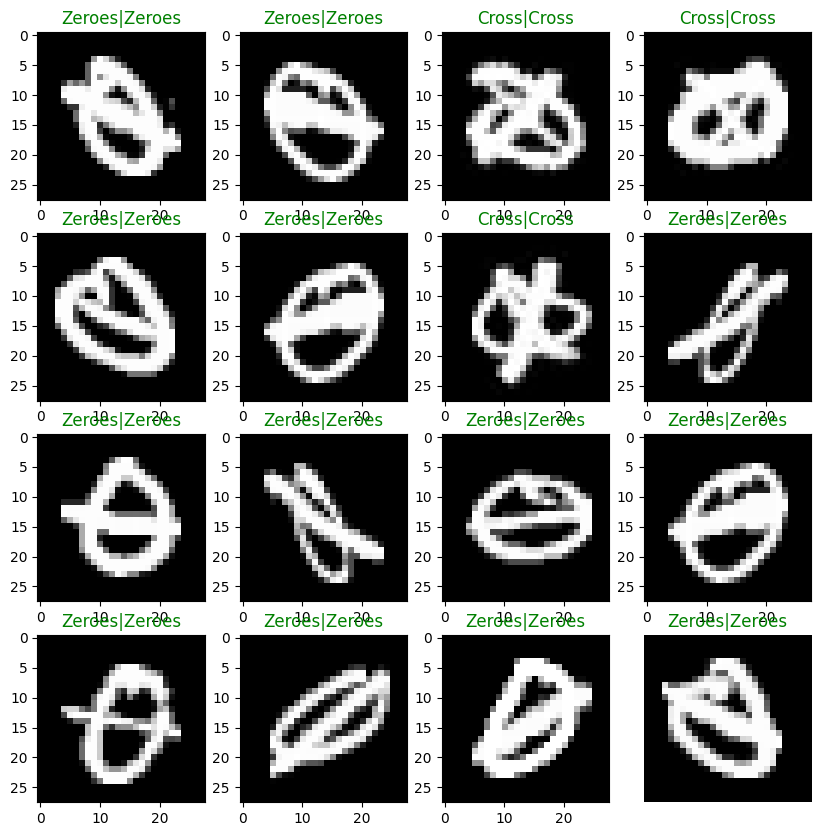

In [35]:
No_of_values_to_predict = 16
plt.figure(figsize=(10,10))
Color = ['r','g']
list_indices = np.random.randint(0,len(train_data),16)
for x in range(16):
    plt.subplot(4,4,x+1)
    plt.imshow(train_data[list_indices[x]][0].squeeze().permute(1,2,0),cmap='gray')
    plt.title(f"{train_data.classes[y_pred[list_indices[x]]]}|{class_names[train_data[list_indices[x]][1]]}",c=Color[is_equal(y_pred[list_indices[x]],train_data.targets[list_indices[x]])])
plt.axis(False)

In [36]:
# torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the learned parameters
            # f="Model_1.pth")
model_2 = model = Model_for_checking_0orX(input_shape=3, 
    hidden_units=100, 
    output_shape=len(train_data.classes))
model.load_state_dict(torch.load(f="Model_1.pth"))

<All keys matched successfully>

### SHASHANK AND ANIRVAN READ AFTER THIS

In [37]:
grid_csv = pd.read_csv("icg-freshers-data-science-competition/Dataset/Train/Grid_labels.csv")
grid_csv

,ID,POS_1,POS_2,POS_3,POS_4,POS_5,POS_6,POS_7,POS_8,POS_9,Decisions
0,58,0,0,1,1,1,0,2,2,0,0
1,160,0,0,1,2,2,2,0,1,1,1
2,162,0,0,1,2,2,2,0,2,1,0
3,287,0,0,2,2,0,1,1,1,2,1
4,500,0,1,0,2,1,2,1,0,0,2
5,618,0,1,1,2,0,1,0,0,2,0
6,886,0,2,0,0,2,1,1,0,1,2
7,1250,0,2,2,0,1,2,1,0,1,2
8,1587,1,0,0,2,1,2,1,0,0,0
9,1610,1,0,0,2,2,1,2,0,1,1


In [38]:
grid_csv["ID"][0]

58

In [39]:
# img=cv2.imread(a)
grid_path = Path("icg-freshers-data-science-competition/Dataset/Train/Grids")
blank_image = np.ones((26,26))*30
imagelist=[]
for x in range(len(grid_csv)):
    img_address = str(grid_csv["ID"][x])+".png"
    a = Path.joinpath(grid_path,img_address)
    print(a)
    images_grid1 = cv2.imread(str(a))
    images_grid1=images_grid1[60:420,145:505]
    img2 = images_grid1

    height, width,color_channels = img2.shape

    # Number of pieces Horizontally 
    W_SIZE  = 3 
    # Number of pieces Vertically to each Horizontal  
    H_SIZE = 3

    # Create a list to store sub-images for the current image
    current_image_parts = []

    for ih in range(H_SIZE):
        for iw in range(W_SIZE):
            x = width / W_SIZE * iw 
            y = height / H_SIZE * ih
            h = (height / H_SIZE)
            w = (width / W_SIZE)

            # Extract the sub-image
            img = img2[int(y):int(y + h), int(x):int(x + w)]
            img = cv2.resize(img, (28, 28))
            # Append the sub-image to the list for the current image
            current_image_parts.append(img)

    # Append the list of sub-images to the main list
    imagelist.append(current_image_parts)

icg-freshers-data-science-competition/Dataset/Train/Grids/58.png
icg-freshers-data-science-competition/Dataset/Train/Grids/160.png
icg-freshers-data-science-competition/Dataset/Train/Grids/162.png
icg-freshers-data-science-competition/Dataset/Train/Grids/287.png
icg-freshers-data-science-competition/Dataset/Train/Grids/500.png
icg-freshers-data-science-competition/Dataset/Train/Grids/618.png
icg-freshers-data-science-competition/Dataset/Train/Grids/886.png
icg-freshers-data-science-competition/Dataset/Train/Grids/1250.png
icg-freshers-data-science-competition/Dataset/Train/Grids/1587.png
icg-freshers-data-science-competition/Dataset/Train/Grids/1610.png
icg-freshers-data-science-competition/Dataset/Train/Grids/2154.png
icg-freshers-data-science-competition/Dataset/Train/Grids/2366.png
icg-freshers-data-science-competition/Dataset/Train/Grids/2425.png
icg-freshers-data-science-competition/Dataset/Train/Grids/2587.png
icg-freshers-data-science-competition/Dataset/Train/Grids/2591.png
icg

In [40]:
len(imagelist)

25

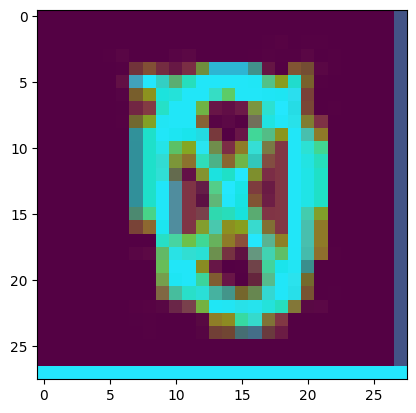

In [41]:
plt.imshow(imagelist[0][0])

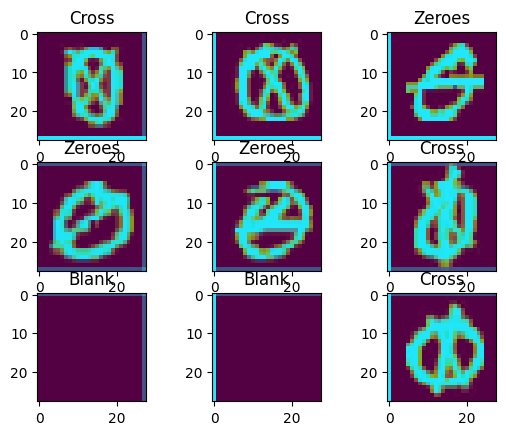

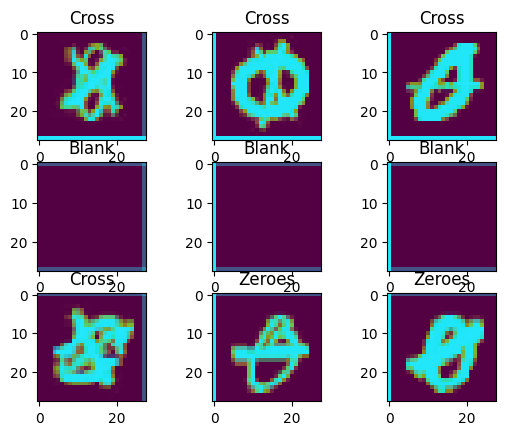

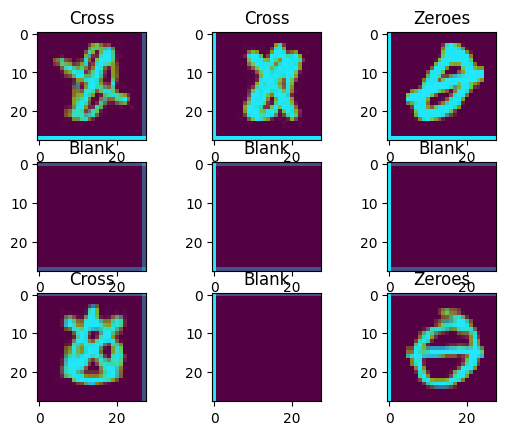

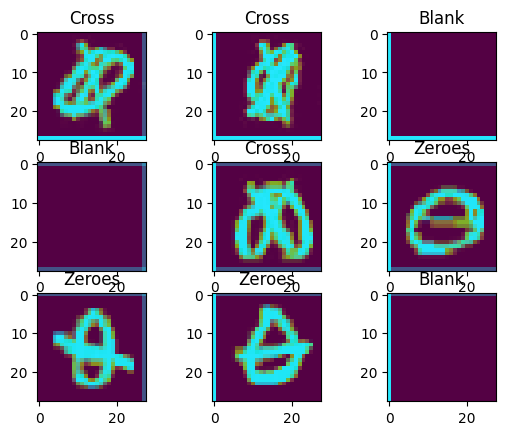

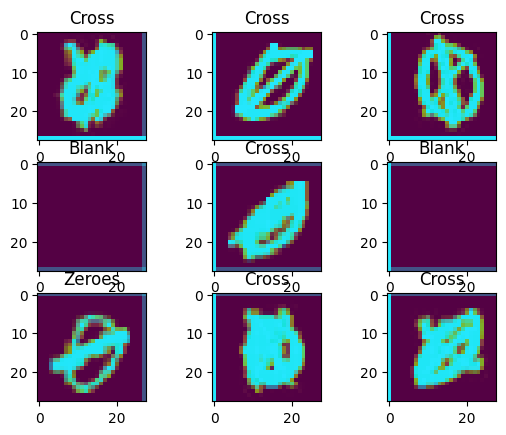

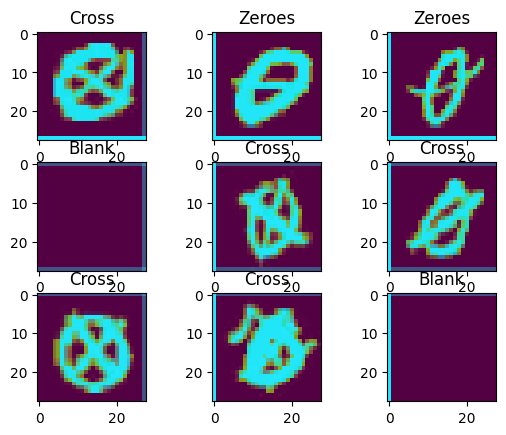

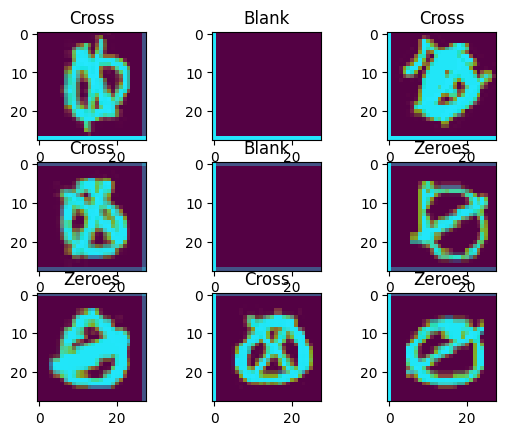

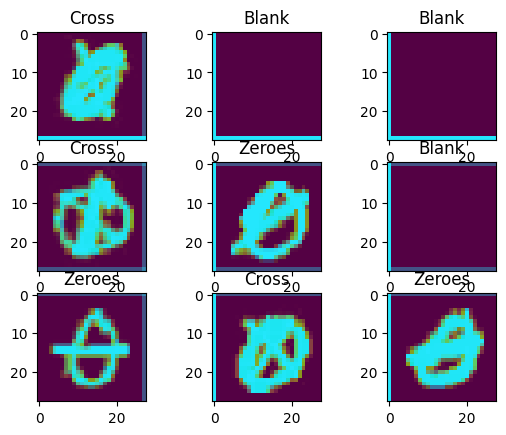

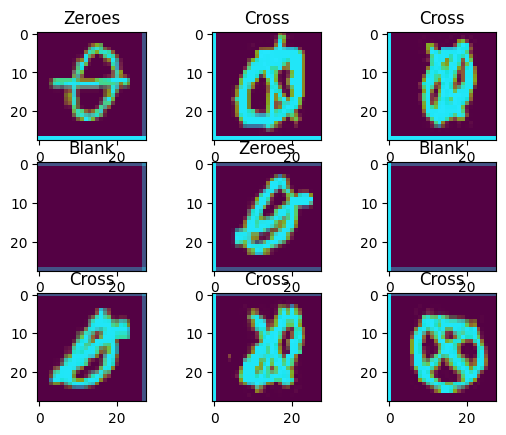

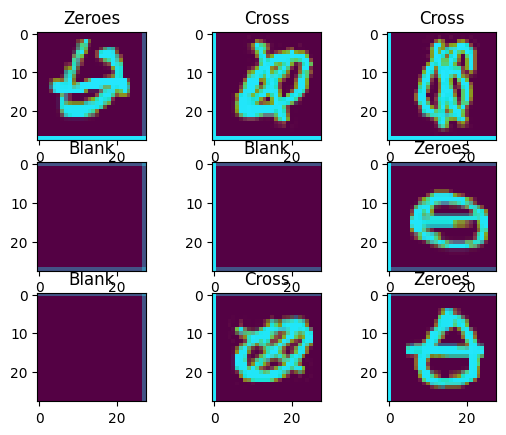

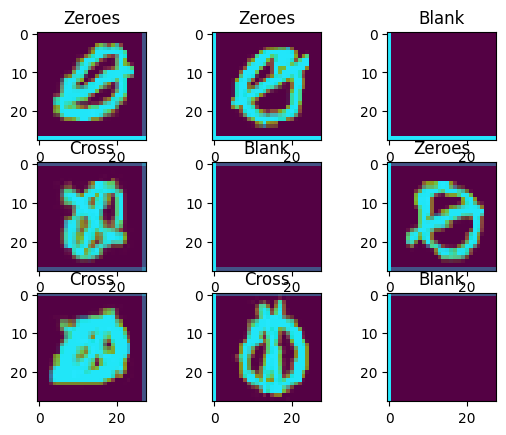

KeyboardInterrupt: 

In [42]:
transform = transforms.ToTensor()
for j in range(len(imagelist)):
    for x in range(9):
        plt.subplot(3,3,x+1)
        plt.imshow(imagelist[j][x])
        if np.array_equal(blank_image,cv2.cvtColor(imagelist[j][x][1:27,1:27], cv2.COLOR_BGR2GRAY)):
            plt.title("Blank")
        else:
            y = model(transform(imagelist[j][x]).unsqueeze(0))
            plt.title(class_names[y.argmax(1)])
    plt.show()

In [43]:
grid_csv.index = np.arange(1,26)
grid_csv

,ID,POS_1,POS_2,POS_3,POS_4,POS_5,POS_6,POS_7,POS_8,POS_9,Decisions
1,58,0,0,1,1,1,0,2,2,0,0
2,160,0,0,1,2,2,2,0,1,1,1
3,162,0,0,1,2,2,2,0,2,1,0
4,287,0,0,2,2,0,1,1,1,2,1
5,500,0,1,0,2,1,2,1,0,0,2
6,618,0,1,1,2,0,1,0,0,2,0
7,886,0,2,0,0,2,1,1,0,1,2
8,1250,0,2,2,0,1,2,1,0,1,2
9,1587,1,0,0,2,1,2,1,0,0,0
10,1610,1,0,0,2,2,1,2,0,1,1


In [44]:
list_map = []
for x in range(25):
    for y in range(9):
        if grid_csv.iloc[x,y+1] !=2:
            list_map.append([imagelist[x][y],grid_csv.iloc[x,y+1]])

In [45]:
class_names

['Cross', 'Zeroes']

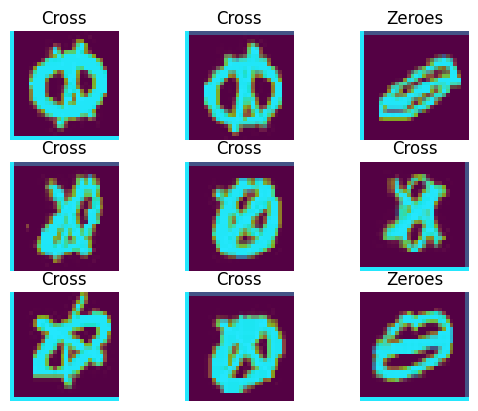

In [46]:
random_indices = np.random.randint(1,len(list_map),(9))
count = 1
for x in random_indices:
    plt.subplot(3,3,count)
    count +=1
    plt.imshow(list_map[x][0])
    plt.title(class_names[list_map[x][1]])
    plt.axis('off')
plt.show()

In [47]:
model(transform(list_map[0][0]).unsqueeze(0)).argmax(1)

tensor([0])

In [48]:
torch.tensor(list_map[x][0]).permute(2,0,1).unsqueeze(0).shape

torch.Size([1, 3, 28, 28])

In [49]:
def accuracy_function(y_pred,y):
    return torch.eq(y_pred.argmax(1),y).sum().item()*100

In [50]:
images = []
labels= []
for x in list_map:
    images.append(Image.fromarray(x[0]))
    labels.append(x[1])

In [51]:
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
    def __len__(self):
        return len(self.images)
    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label)  # Convert label to tensor if it's not already

# Example usage:

# Assuming you have lists of image paths and labels
# Define transformations for image preprocessing

# Create a custom dataset

custom_dataset = CustomDataset(images, labels, transform=data_transform)

# Create a DataLoader to handle batching and shuffling
batch_size = 32
shuffle = True
num_workers = 4  # Number of CPU processes to use for data loading
data_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

# Iterate through the DataLoader during training


In [52]:
train_loss, train_acc = 0, 0
epochs = 5
for epoch in range(epochs):
    train_loss = 0
    train_accuracy = 0
    for Batch,(X,y) in enumerate(iter(data_loader)):
        model.train()
        y_pred = model(X)
        loss = loss_fn(y_pred,y)
        train_loss +=loss
        accuracy = accuracy_function(y_pred,y) 
        train_accuracy+=accuracy
        optimizer.zero_grad()
        loss.backward()
        # print(loss)
        optimizer.step()
    print(f"\n{epoch}|Average loss: {(train_loss/len(images))}|Average Accuracy:{(train_accuracy/len(images)):.2f}%\n")


0|Average loss: 0.005486675072461367|Average Accuracy:94.48%


1|Average loss: 0.005509138572961092|Average Accuracy:94.48%


2|Average loss: 0.005232582334429026|Average Accuracy:95.17%


3|Average loss: 0.005462041590362787|Average Accuracy:93.79%


4|Average loss: 0.005610452499240637|Average Accuracy:96.55%



In [53]:
# torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the learned parameters
#             f="Model_1.pth")

In [54]:
y_pred

tensor([[ 1.5553, -1.5078],
        [ 1.6690, -1.5909],
        [ 1.7356, -1.6714],
        [-0.4566,  0.5169],
        [-2.5792,  2.5361],
        [-0.8467,  0.9216],
        [-0.0677,  0.0788],
        [ 0.3395, -0.2572],
        [ 2.2053, -2.2065],
        [-1.6425,  1.5676],
        [ 0.9519, -1.0151],
        [ 1.3730, -1.3674],
        [ 1.0487, -1.1057],
        [-2.3636,  2.3742],
        [ 1.5688, -1.5019],
        [-1.4093,  1.4729],
        [ 1.0707, -1.0521]], grad_fn=<AddmmBackward0>)

In [55]:
X,y =list_map[0]
y = torch.tensor(y)
y

tensor(0)

In [56]:


grid_csv.iloc[0,2]

0

In [57]:
y_expected = np.array(grid_csv['Decisions'])

In [58]:
y_expected = torch.tensor(y_expected)

In [59]:
X  = [] 
for x in range(len(grid_csv)):
    X.append(grid_csv.iloc[1,1:10])

In [60]:
len(X)

25

In [61]:
X = []
for x in range(0,25):
    X.append(torch.tensor(grid_csv.iloc[x,1:10],dtype=torch.float))

/tmp/ipykernel_5040/1477014975.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X.append(torch.tensor(grid_csv.iloc[x,1:10],dtype=torch.float))


In [62]:
len(X)

25

In [63]:
nn.Flatten()

Flatten(start_dim=1, end_dim=-1)

In [64]:
class Model_Who_will_win(nn.Module):
    def __init__(self,input_features,hidden_units,output_features) -> None:
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            # nn.Flatten(),
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

In [65]:
model_predict = Model_Who_will_win(9,1000,3)

In [66]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_predict.parameters(), 
                            lr=0.00001)

In [67]:
torch.tensor(grid_csv.iloc[1,1:10])

/tmp/ipykernel_5040/3667532071.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  torch.tensor(grid_csv.iloc[1,1:10])


tensor([0, 0, 1, 2, 2, 2, 0, 1, 1])

In [68]:
model_predict(X[0])


tensor([-0.0108, -0.0097, -0.0582], grad_fn=<ViewBackward0>)

In [69]:
def accuracy_function(y_pred,y):
    return torch.eq(y_pred,y).sum().item()/len(y_pred)*100

In [70]:
y_pred.shape

torch.Size([17, 2])

In [71]:
epochs = 1000
for epoch in range(epochs):
    y_pred = []
    total_loss,total_acc = 0,0
    for x in range(len(X)):
        # 1. Forward pass
        y_logits = model_predict(X[x]) # model outputs raw logits 
        y_pred.append(y_logits.argmax(0)) # go from logits -> prediction probabilities -> prediction labels
        # print(y_logits)
        # 2. Calculate loss and accuracy
        # y_pred = torch.tensor(y_pred,dtype = torch.float,requires_grad=True)
        loss = loss_fn(y_logits, y_expected[x])
        total_loss += loss 


        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backwards
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
    y_pred = torch.tensor(y_pred,dtype=torch.float)
    y_pred.shape
    acc = accuracy_function(y=y_expected,y_pred=y_pred)
    print(f"Epoch: {epoch} | Loss: {total_loss:.5f}, Acc: {acc:.2f}% ") 

Epoch: 0 | Loss: 27.69103, Acc: 20.00% 
Epoch: 1 | Loss: 27.66647, Acc: 24.00% 
Epoch: 2 | Loss: 27.64225, Acc: 24.00% 
Epoch: 3 | Loss: 27.61835, Acc: 24.00% 
Epoch: 4 | Loss: 27.59476, Acc: 24.00% 
Epoch: 5 | Loss: 27.57148, Acc: 32.00% 
Epoch: 6 | Loss: 27.54850, Acc: 36.00% 
Epoch: 7 | Loss: 27.52582, Acc: 36.00% 
Epoch: 8 | Loss: 27.50343, Acc: 36.00% 
Epoch: 9 | Loss: 27.48131, Acc: 36.00% 
Epoch: 10 | Loss: 27.45947, Acc: 36.00% 
Epoch: 11 | Loss: 27.43791, Acc: 36.00% 
Epoch: 12 | Loss: 27.41661, Acc: 32.00% 
Epoch: 13 | Loss: 27.39557, Acc: 36.00% 
Epoch: 14 | Loss: 27.37478, Acc: 36.00% 
Epoch: 15 | Loss: 27.35423, Acc: 36.00% 
Epoch: 16 | Loss: 27.33394, Acc: 36.00% 
Epoch: 17 | Loss: 27.31388, Acc: 36.00% 
Epoch: 18 | Loss: 27.29405, Acc: 36.00% 
Epoch: 19 | Loss: 27.27446, Acc: 36.00% 
Epoch: 20 | Loss: 27.25508, Acc: 36.00% 
Epoch: 21 | Loss: 27.23593, Acc: 36.00% 
Epoch: 22 | Loss: 27.21698, Acc: 40.00% 
Epoch: 23 | Loss: 27.19825, Acc: 44.00% 
Epoch: 24 | Loss: 27.17973

KeyboardInterrupt: 

In [72]:
model_predict.load_state_dict(torch.load(f= 'Model_win_or_lose.pth'))

<All keys matched successfully>

In [ ]:
# torch.save(obj=model_predict.state_dict(), # only saving the state_dict() only saves the learned parameters
#            f="Model_win_or_lose.pth"))

In [73]:
submition = pd.read_csv('icg-freshers-data-science-competition/Dataset/Sample_submission.csv')
submition.head()

,ID,POS_1,POS_2,POS_3,POS_4,POS_5,POS_6,POS_7,POS_8,POS_9,Decision
0,0,2,2,2,2,2,2,2,2,2,0
1,1,2,2,2,2,2,2,2,2,2,0
2,2,2,2,2,2,2,2,2,2,2,0
3,3,2,2,2,2,2,2,2,2,2,0
4,4,2,2,2,2,2,2,2,2,2,0


In [74]:
predictions = []
for x in range(len(submition)):
    predictions.append(model_predict(torch.tensor(submition.iloc[0,1:10],dtype=torch.float)).argmax(0))

/tmp/ipykernel_5040/1558109329.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predictions.append(model_predict(torch.tensor(submition.iloc[0,1:10],dtype=torch.float)).argmax(0))


In [75]:
predictions[:10]

[tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1)]

In [149]:
# img=cv2.imread(a)
grid_path = Path("icg-freshers-data-science-competition/Dataset/Test")
imagelist_test=[]
items = []
for x in range(4520):
    img_address = str(x)+".png"
    a = Path.joinpath(grid_path,img_address)
    # print(a)
    try:
        images_grid1 = cv2.imread(str(a))
        images_grid1=images_grid1[60:420,145:505]
        img2 = images_grid1

        height, width,color_channels = img2.shape

        # Number of pieces Horizontally 
        W_SIZE  = 3 
        # Number of pieces Vertically to each Horizontal  
        H_SIZE = 3

        # Create a list to store sub-images for the current image
    except:
        continue
    current_image_parts = []

    items.append(x)
    for ih in range(H_SIZE):
        for iw in range(W_SIZE):
            x = width / W_SIZE * iw 
            y = height / H_SIZE * ih
            h = (height / H_SIZE)
            w = (width / W_SIZE)

            # Extract the sub-image
            img = img2[int(y):int(y + h), int(x):int(x + w)]
            img = cv2.resize(img, (28, 28))
            # Append the sub-image to the list for the current image
            current_image_parts.append(img)

    # Append the list of sub-images to the main list
    imagelist_test.append(current_image_parts)

[ WARN:0@3149.440] global loadsave.cpp:248 findDecoder imread_('icg-freshers-data-science-competition/Dataset/Test/58.png'): can't open/read file: check file path/integrity
[ WARN:0@3150.151] global loadsave.cpp:248 findDecoder imread_('icg-freshers-data-science-competition/Dataset/Test/160.png'): can't open/read file: check file path/integrity
[ WARN:0@3150.157] global loadsave.cpp:248 findDecoder imread_('icg-freshers-data-science-competition/Dataset/Test/162.png'): can't open/read file: check file path/integrity
[ WARN:0@3150.987] global loadsave.cpp:248 findDecoder imread_('icg-freshers-data-science-competition/Dataset/Test/287.png'): can't open/read file: check file path/integrity
[ WARN:0@3152.355] global loadsave.cpp:248 findDecoder imread_('icg-freshers-data-science-competition/Dataset/Test/500.png'): can't open/read file: check file path/integrity
[ WARN:0@3153.232] global loadsave.cpp:248 findDecoder imread_('icg-freshers-data-science-competition/Dataset/Test/618.png'): can't

In [150]:
items[-1]

4519

(<matplotlib.image.AxesImage at 0x7fab1e5c08b0>, 0)

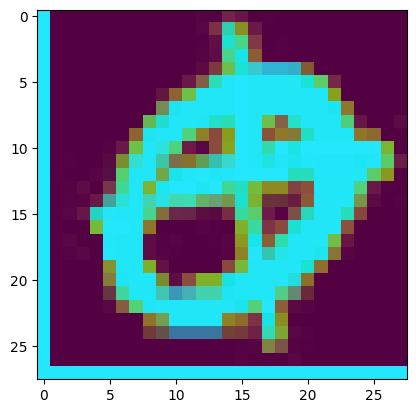

In [151]:
img = imagelist_test[0][1]
# img_permute = img.permute(1, 2, 0)
plt.imshow(img),items[0]

In [152]:
values = dict()
for j in range(len(imagelist_test)):
    pos_value = []
    for x in range(9):
        if np.array_equal(blank_image,cv2.cvtColor(imagelist_test[j][x][1:27,1:27], cv2.COLOR_BGR2GRAY)):
            pos_value.append(2)
        else:
            y = model(transform(imagelist_test[j][x]).unsqueeze(0))
            pos_value.append(int(y.argmax(1)))
    values[items[j]] = pos_value
    print(f"Done for {items[j]}.png|{j+1} items done!!")

Done for 0.png|1 items done!!
Done for 1.png|2 items done!!
Done for 2.png|3 items done!!
Done for 3.png|4 items done!!
Done for 4.png|5 items done!!
Done for 5.png|6 items done!!
Done for 6.png|7 items done!!
Done for 7.png|8 items done!!
Done for 8.png|9 items done!!
Done for 9.png|10 items done!!
Done for 10.png|11 items done!!
Done for 11.png|12 items done!!
Done for 12.png|13 items done!!
Done for 13.png|14 items done!!
Done for 14.png|15 items done!!
Done for 15.png|16 items done!!
Done for 16.png|17 items done!!
Done for 17.png|18 items done!!
Done for 18.png|19 items done!!
Done for 19.png|20 items done!!
Done for 20.png|21 items done!!
Done for 21.png|22 items done!!
Done for 22.png|23 items done!!
Done for 23.png|24 items done!!
Done for 24.png|25 items done!!
Done for 25.png|26 items done!!
Done for 26.png|27 items done!!
Done for 27.png|28 items done!!
Done for 28.png|29 items done!!
Done for 29.png|30 items done!!
Done for 30.png|31 items done!!
Done for 31.png|32 items do

In [156]:
items[len(imagelist_test)-1]

4519

In [157]:
len(items)

4495

In [158]:
values[4494]

[2, 2, 2, 2, 2, 0, 2, 1, 0]

In [159]:
value2 = values.copy()
for key in value2.keys():
    decision = model_predict(torch.tensor(value2[key],dtype=torch.float))
    value2[key].append(int(decision.argmax(0)))
    print(f"Done for {key}.png !!")

Done for 0.png !!
Done for 1.png !!
Done for 2.png !!
Done for 3.png !!
Done for 4.png !!
Done for 5.png !!
Done for 6.png !!
Done for 7.png !!
Done for 8.png !!
Done for 9.png !!
Done for 10.png !!
Done for 11.png !!
Done for 12.png !!
Done for 13.png !!
Done for 14.png !!
Done for 15.png !!
Done for 16.png !!
Done for 17.png !!
Done for 18.png !!
Done for 19.png !!
Done for 20.png !!
Done for 21.png !!
Done for 22.png !!
Done for 23.png !!
Done for 24.png !!
Done for 25.png !!
Done for 26.png !!
Done for 27.png !!
Done for 28.png !!
Done for 29.png !!
Done for 30.png !!
Done for 31.png !!
Done for 32.png !!
Done for 33.png !!
Done for 34.png !!
Done for 35.png !!
Done for 36.png !!
Done for 37.png !!
Done for 38.png !!
Done for 39.png !!
Done for 40.png !!
Done for 41.png !!
Done for 42.png !!
Done for 43.png !!
Done for 44.png !!
Done for 45.png !!
Done for 46.png !!
Done for 47.png !!
Done for 48.png !!
Done for 49.png !!
Done for 50.png !!
Done for 51.png !!
Done for 52.png !!
Don

Done for 181.png !!
Done for 182.png !!
Done for 183.png !!
Done for 184.png !!
Done for 185.png !!
Done for 186.png !!
Done for 187.png !!
Done for 188.png !!
Done for 189.png !!
Done for 190.png !!
Done for 191.png !!
Done for 192.png !!
Done for 193.png !!
Done for 194.png !!
Done for 195.png !!
Done for 196.png !!
Done for 197.png !!
Done for 198.png !!
Done for 199.png !!
Done for 200.png !!
Done for 201.png !!
Done for 202.png !!
Done for 203.png !!
Done for 204.png !!
Done for 205.png !!
Done for 206.png !!
Done for 207.png !!
Done for 208.png !!
Done for 209.png !!
Done for 210.png !!
Done for 211.png !!
Done for 212.png !!
Done for 213.png !!
Done for 214.png !!
Done for 215.png !!
Done for 216.png !!
Done for 217.png !!
Done for 218.png !!
Done for 219.png !!
Done for 220.png !!
Done for 221.png !!
Done for 222.png !!
Done for 223.png !!
Done for 224.png !!
Done for 225.png !!
Done for 226.png !!
Done for 227.png !!
Done for 228.png !!
Done for 229.png !!
Done for 230.png !!


In [161]:
int(decision.argmax(0))

1

In [162]:
value2

{0: [0, 0, 1, 0, 0, 1, 1, 1, 2, 0],
 1: [0, 0, 1, 0, 0, 1, 1, 2, 2, 0],
 2: [0, 0, 1, 0, 0, 1, 2, 1, 2, 2],
 3: [0, 0, 1, 0, 0, 2, 1, 1, 2, 0],
 4: [0, 0, 1, 0, 0, 2, 1, 2, 1, 0],
 5: [0, 0, 1, 0, 0, 2, 2, 1, 1, 2],
 6: [0, 0, 0, 0, 1, 0, 2, 0, 1, 2],
 7: [0, 0, 1, 0, 1, 0, 2, 0, 2, 1],
 8: [1, 0, 1, 0, 1, 0, 2, 2, 1, 0],
 9: [0, 0, 1, 0, 1, 1, 2, 0, 2, 2],
 10: [0, 0, 1, 0, 1, 1, 2, 1, 0, 1],
 11: [0, 0, 1, 0, 1, 1, 2, 2, 0, 0],
 12: [0, 0, 1, 0, 1, 1, 2, 2, 2, 0],
 13: [0, 0, 1, 0, 1, 2, 2, 0, 1, 2],
 14: [0, 0, 0, 0, 1, 2, 2, 1, 0, 2],
 15: [0, 0, 1, 0, 1, 2, 2, 1, 2, 2],
 16: [0, 0, 1, 0, 1, 2, 2, 2, 1, 0],
 17: [0, 0, 1, 0, 1, 2, 2, 2, 2, 0],
 18: [0, 0, 0, 0, 2, 0, 1, 0, 2, 2],
 19: [0, 0, 1, 0, 2, 0, 1, 2, 1, 0],
 20: [0, 0, 1, 0, 2, 0, 2, 1, 1, 1],
 21: [0, 0, 0, 0, 2, 1, 1, 0, 2, 2],
 22: [0, 0, 1, 0, 2, 1, 1, 1, 0, 0],
 23: [0, 0, 1, 0, 2, 1, 1, 2, 0, 0],
 24: [0, 0, 1, 0, 2, 1, 0, 2, 2, 0],
 25: [0, 0, 1, 0, 2, 1, 2, 1, 0, 1],
 26: [0, 0, 1, 0, 2, 1, 2, 1, 2, 1],
 27: [0, 0,

In [163]:
df = pd.DataFrame(values).T
df.reset_index(inplace=True)
df.index = np.arange(1,len(values)+1)

In [164]:
df

,index,0,1,2,3,4,5,6,7,8,9
1,0,0,0,1,0,0,1,1,1,2,0
2,1,0,0,1,0,0,1,1,2,2,0
3,2,0,0,1,0,0,1,2,1,2,2
4,3,0,0,1,0,0,2,1,1,2,0
5,4,0,0,1,0,0,2,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4491,4515,2,2,2,2,2,2,2,0,1,1
4492,4516,2,2,2,2,2,2,2,0,2,1
4493,4517,2,2,2,2,2,2,2,1,0,1
4494,4518,2,2,2,2,2,2,2,2,0,1


In [165]:
df.columns = ["ID","POS_1","POS_2","POS_3","POS_4","POS_5","POS_6","POS_7","POS_8","POS_9","Decision"]

In [166]:
df["ID"] = values.keys()
df

,ID,POS_1,POS_2,POS_3,POS_4,POS_5,POS_6,POS_7,POS_8,POS_9,Decision
1,0,0,0,1,0,0,1,1,1,2,0
2,1,0,0,1,0,0,1,1,2,2,0
3,2,0,0,1,0,0,1,2,1,2,2
4,3,0,0,1,0,0,2,1,1,2,0
5,4,0,0,1,0,0,2,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4491,4515,2,2,2,2,2,2,2,0,1,1
4492,4516,2,2,2,2,2,2,2,0,2,1
4493,4517,2,2,2,2,2,2,2,1,0,1
4494,4518,2,2,2,2,2,2,2,2,0,1


In [167]:
df.to_csv('Final_submission.csv', index=False)

In [ ]:
pd.read_csv('icg-freshers-data-science-competition/Dataset/Sample_submission.csv')

,ID,POS_1,POS_2,POS_3,POS_4,POS_5,POS_6,POS_7,POS_8,POS_9,Decision
0,0,2,2,2,2,2,2,2,2,2,0
1,1,2,2,2,2,2,2,2,2,2,0
2,2,2,2,2,2,2,2,2,2,2,0
3,3,2,2,2,2,2,2,2,2,2,0
4,4,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
4490,4515,2,2,2,2,2,2,2,2,2,0
4491,4516,2,2,2,2,2,2,2,2,2,0
4492,4517,2,2,2,2,2,2,2,2,2,0
4493,4518,2,2,2,2,2,2,2,2,2,0
